In [1]:
from surrogate_data.data import load_image
from surrogate_data.surrogate import SurrogateMap, variogram
import matplotlib.pyplot as plt
plt.style.use("bmh")

# load example data
file_img = "./images/flower.jpg"
data = load_image(file_img)

In [2]:
# fit variogram
surr = SurrogateMap(data, num_cores=8)
coeff = surr.fit()
_, _, residuals = coeff["all"]
alpha_best, beta_best, k_best = coeff["best"]
# generate new surrogate map
surr_data = surr.generate(1)[0, :, :]

100%|██████████| 20/20 [06:07<00:00, 18.37s/it]


ALPHA: 269.9222200221289
BETA: 1.1254324474989257
K: 47


Text(0, 0.5, 'Residuals')

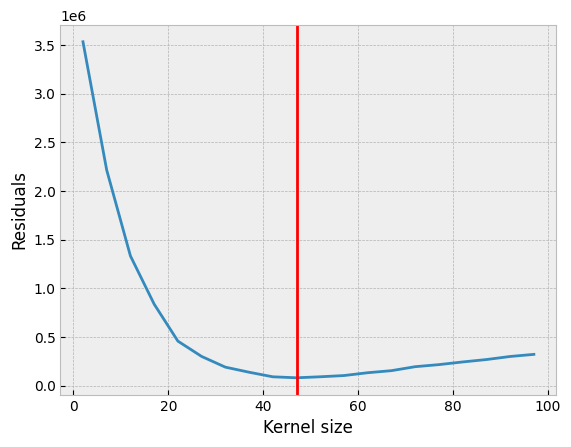

In [3]:
# plot residuals of the linear fit
# the fit with smallest residuals (red lines) is selected for surrogate map generation
plt.plot(surr.k_smooth, residuals)
plt.axvline(k_best, color="red")
plt.xlabel("Kernel size")
plt.ylabel("Residuals")

Text(0.5, 1.0, 'Surrogate map')

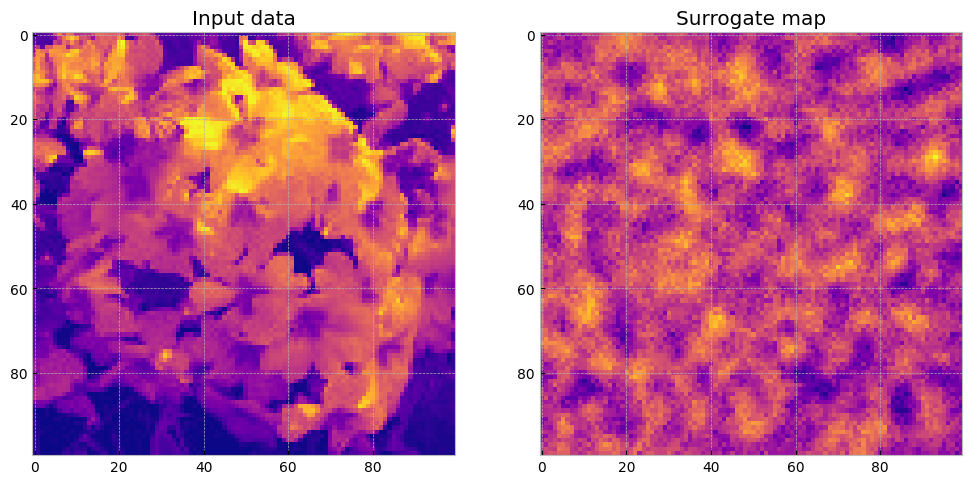

In [4]:
# show input data and exemplary generate surrogate maps with preserved autocorrelation
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(data, cmap='plasma')
ax1.set_title("Input data")
ax2.imshow(surr_data, cmap='plasma')
ax2.set_title("Surrogate map")

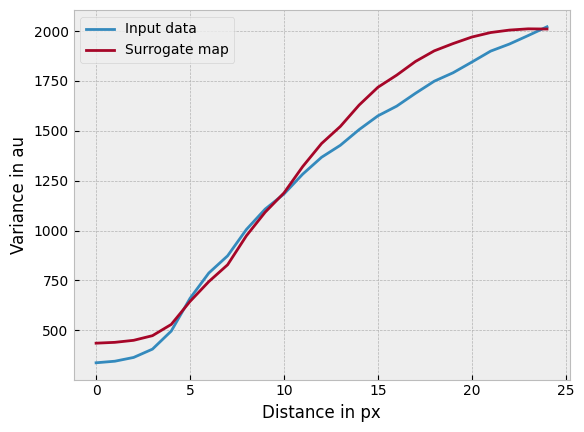

In [5]:
# show variogram for original and surrogate map to illustrate that both match
plt.plot(surr.var_0, label="Input data")
plt.plot(variogram(surr_data, surr.lags, surr.bw, num_cores=8), label="Surrogate map")
plt.xlabel("Distance in px")
plt.ylabel("Variance in au")
plt.legend()

Text(0, 0.5, 'Counts')

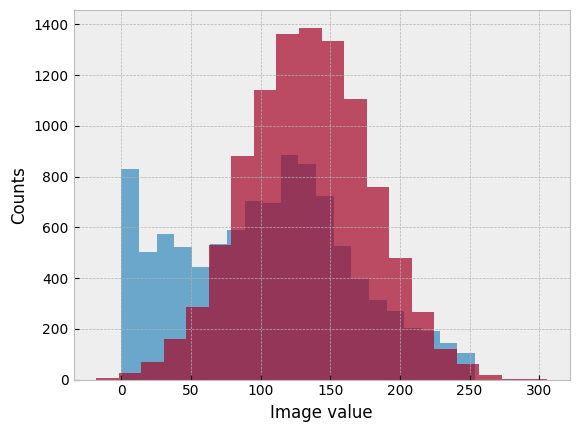

In [6]:
# however, pixel intensities do not match between original and surrogate map
_ = plt.hist(data.flatten(), 20, alpha=0.7)
_ = plt.hist(surr_data.flatten(), 20, alpha=0.7)
plt.xlabel("Image value")
plt.ylabel("Counts")